Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\14_Decision_tree\Fraud_check.csv')

In [3]:
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [4]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


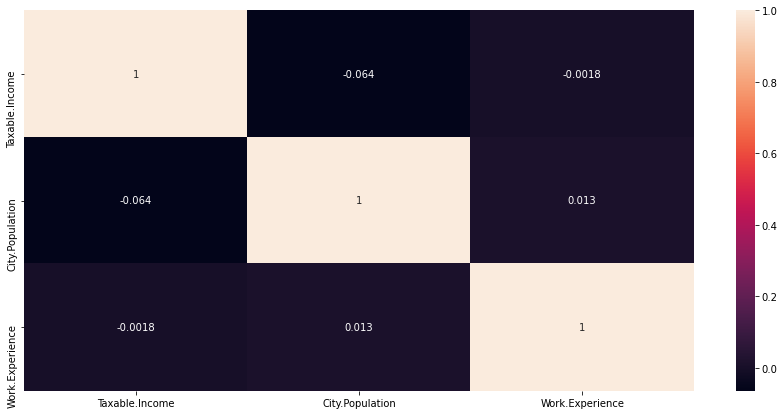

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [7]:
#grouping Taxable income  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


bins = [0,30000,100000]
labels= ['Risky','Good']
df['Status'] = pd.cut(df['Taxable.Income'],bins=bins, labels=labels,right=False)

In [8]:
df.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban Status  
0   YES   Good  
1   YES   Good  
2   YES   Good  
3   YES   Good  
4    NO   Good

In [9]:
# label encoding

def label_encoding(data):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in data.select_dtypes(include=['object','category']).columns:
        data[i]= label_encoder.fit_transform(data.select_dtypes(include=['object','category'])[i]) 
        
    return data.head()

In [11]:
df2 = df.drop(columns=['Taxable.Income'])

In [14]:
label_encoding(df2)

Undergrad  Marital.Status  City.Population  Work.Experience  Urban  Status
0          0               2            50047               10      1       0
1          1               0           134075               18      1       0
2          0               1           160205               30      1       0
3          1               2           193264               15      1       0
4          0               1            27533               28      0       0

In [15]:
## building model

#importin libraries
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [16]:
# Splitting data into training and testing data set
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1:]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, stratify =y,random_state=40)


In [17]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

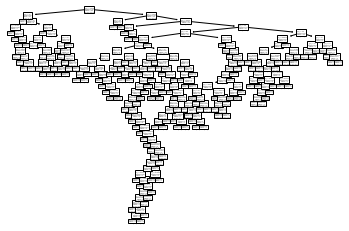

In [18]:
#PLot the decision tree
tree.plot_tree(model);

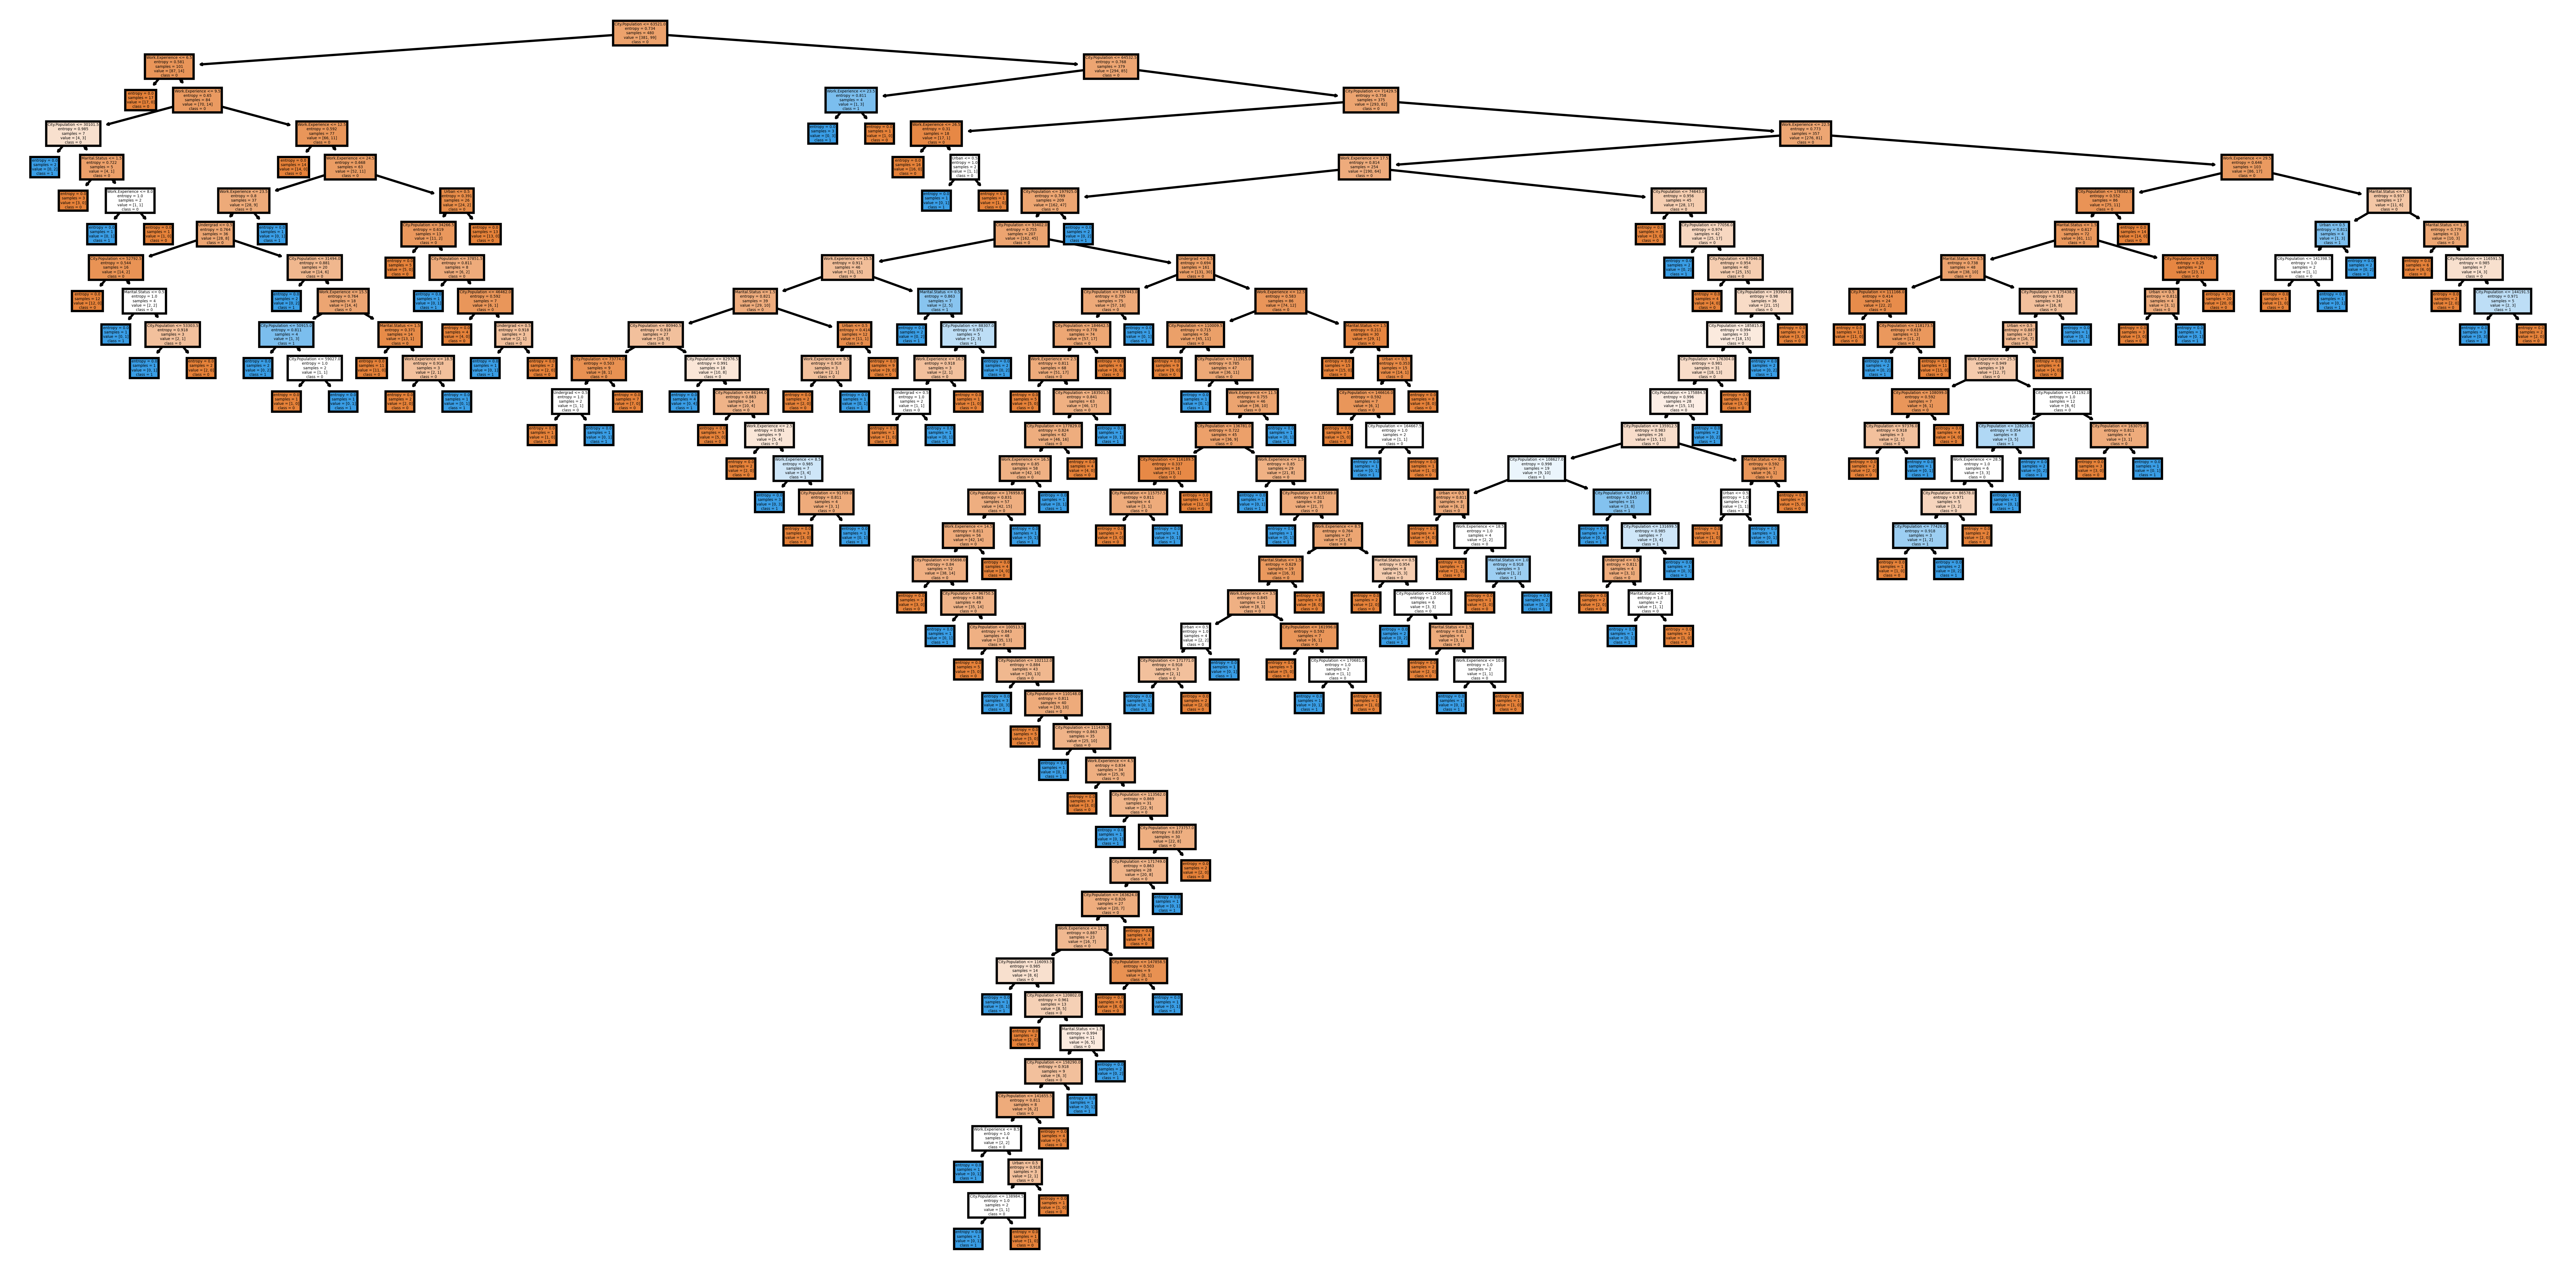

In [19]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()

In [20]:
#Predicting on test data
y_pred = model.predict(x_test) # predicting on test data set 
pd.Series(y_pred).value_counts() # getting the count of each category 

0    97
1    23
dtype: int64

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[77, 18],
       [20,  5]], dtype=int64)

In [23]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        95
           1       0.22      0.20      0.21        25

    accuracy                           0.68       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.67      0.68      0.68       120



In [24]:
#Changing max_depth to improve model accuracy

train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model1 = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

In [25]:
frame = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})

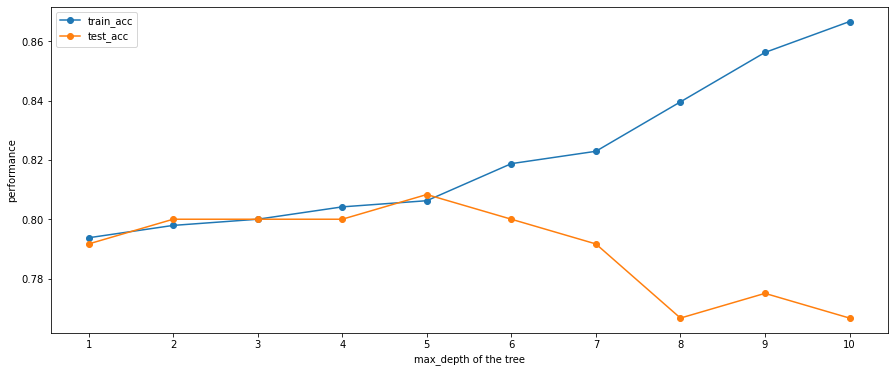

In [26]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [27]:
# let test with max depth 5

model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [28]:
#Predicting on test data
y_pred2 = model2.predict(x_test) # predicting on test data set 
pd.Series(y_pred2).value_counts() # getting the count of each category 

0    118
1      2
dtype: int64

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred2)

array([[95,  0],
       [23,  2]], dtype=int64)

In [30]:
# classification report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        95
           1       1.00      0.08      0.15        25

    accuracy                           0.81       120
   macro avg       0.90      0.54      0.52       120
weighted avg       0.85      0.81      0.74       120



In [31]:
# Model accuracy is increasing for max depth 5

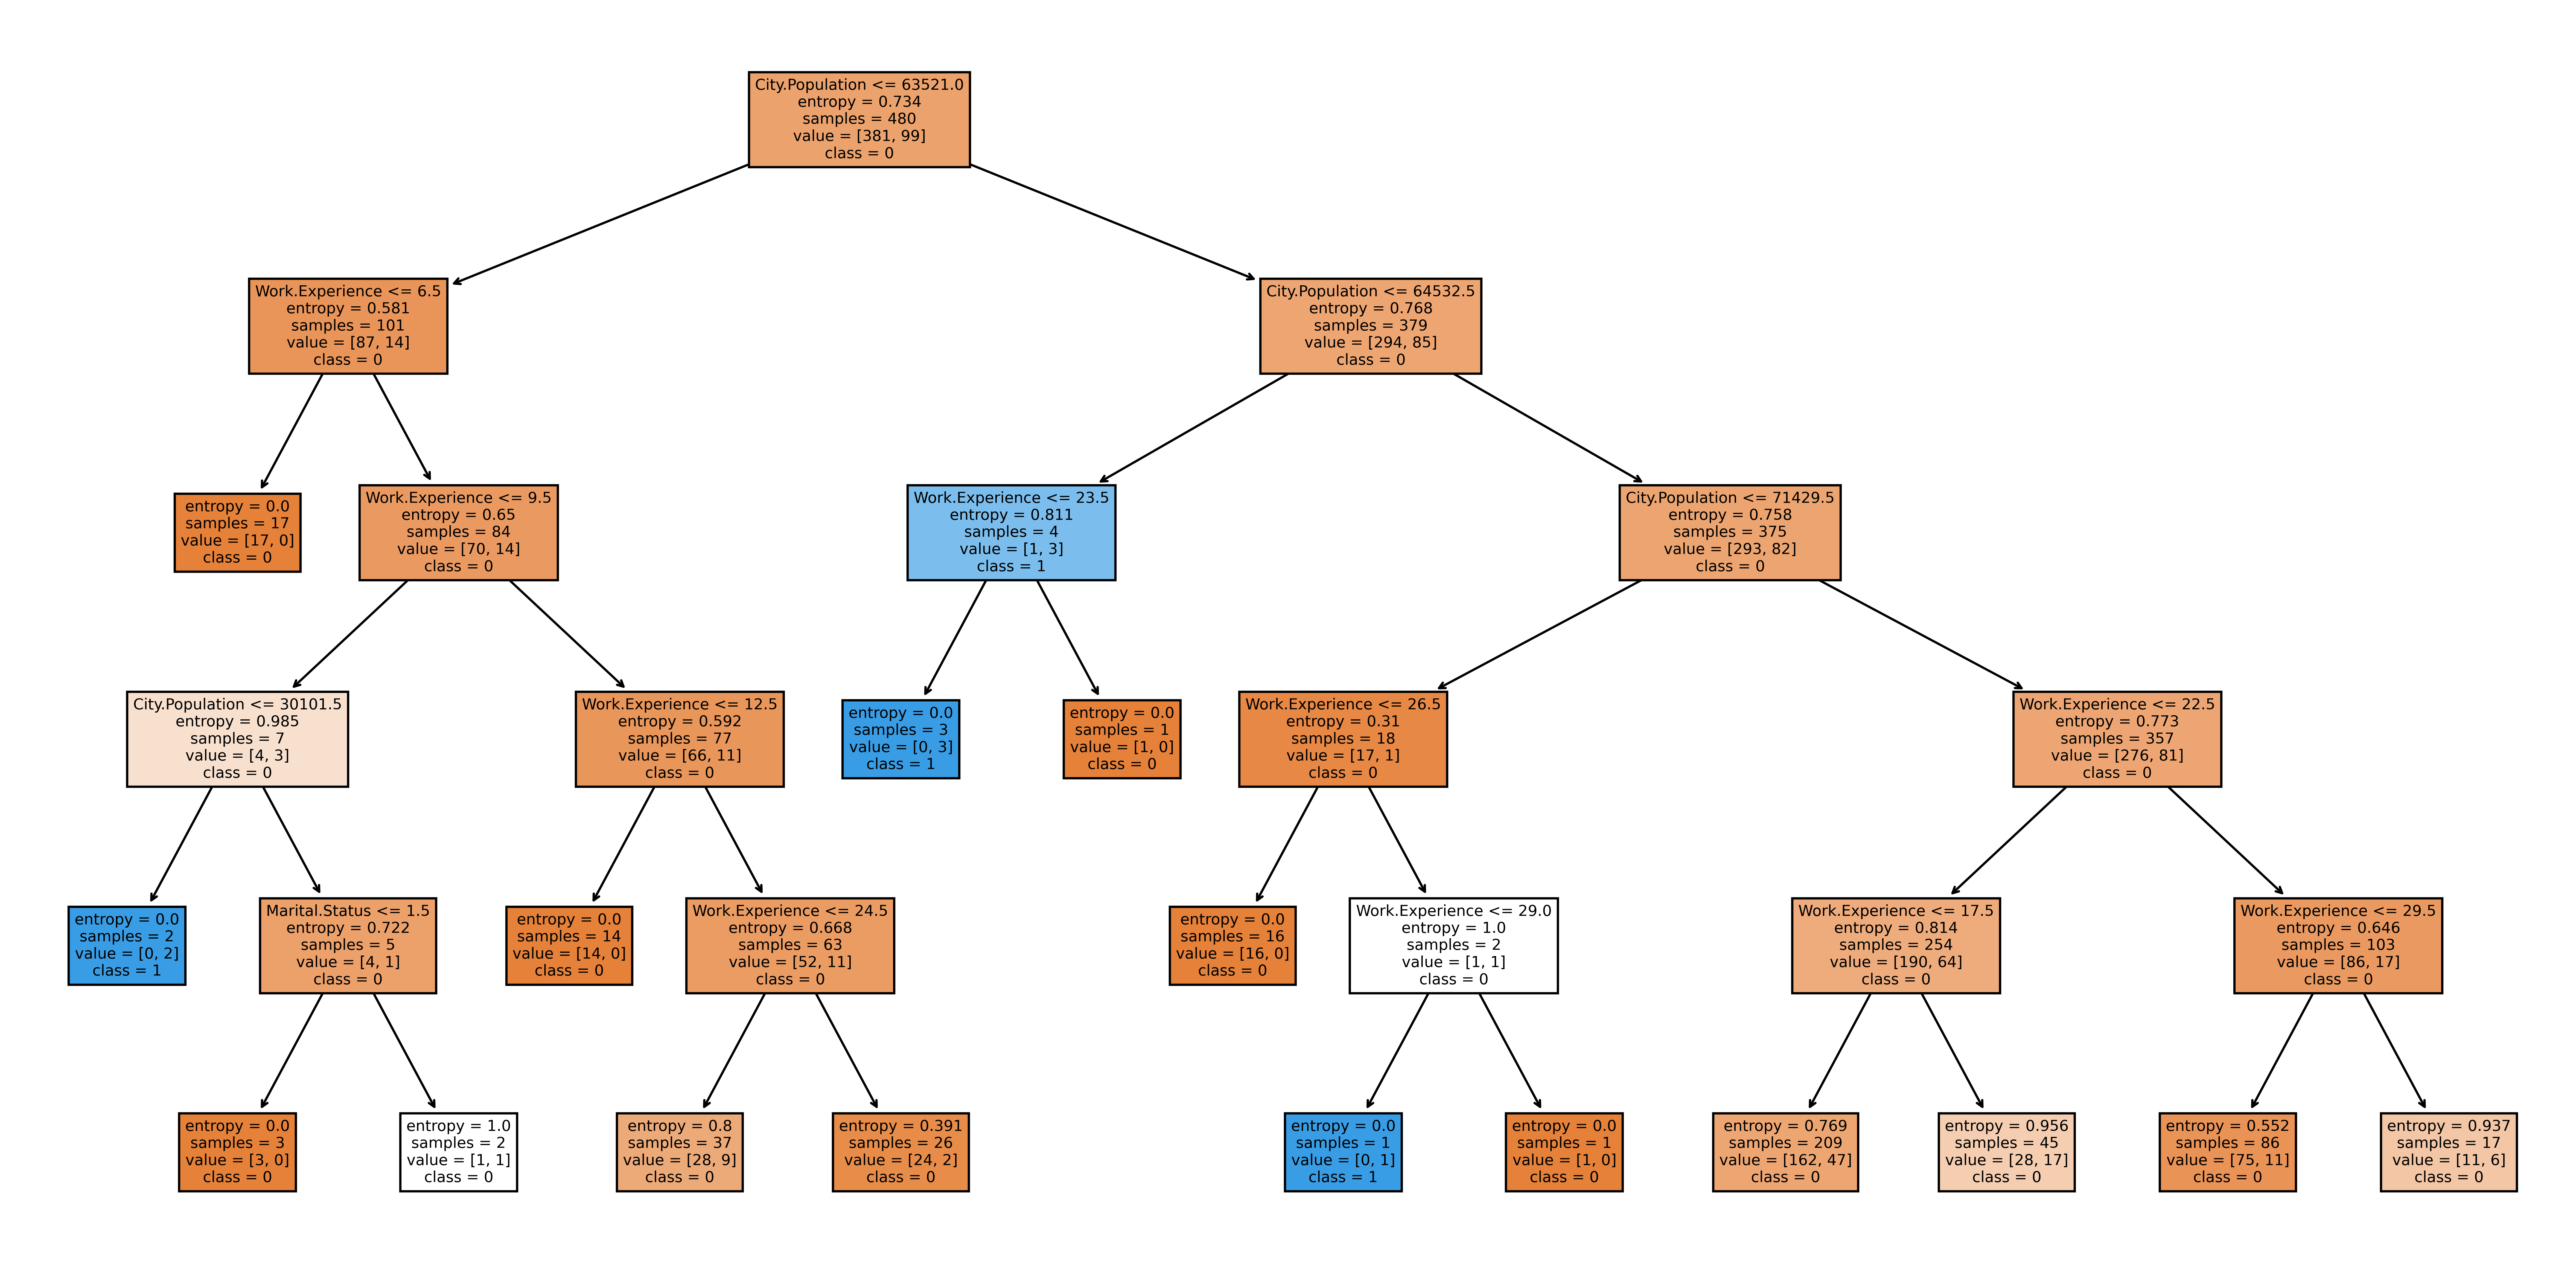

In [32]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban']
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=600)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.show()